<a href="https://www.kaggle.com/code/avadhutsarmalkar/titanic-machine-learning-from-disaster?scriptVersionId=165400137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Titanic - Machine Learning from Disaster ](https://www.kaggle.com/competitions/titanic)
  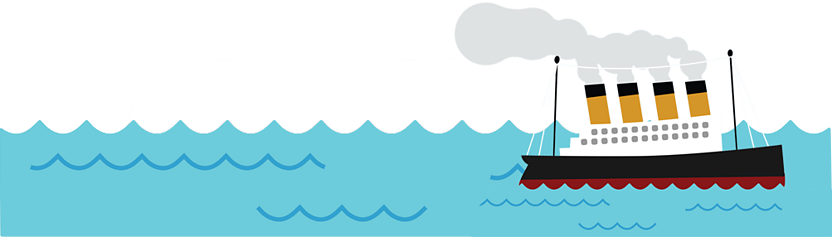

Table of contents


In [1]:
# Importing the libraries

import numpy as np # linear algebra
from sklearn.utils import resample
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import sklearn
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes,ensemble,discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# Loading the Datasets
        
train = pd.read_csv('/kaggle/input/titanic/train.csv',sep= ',')
test = pd.read_csv('/kaggle/input/titanic/test.csv',sep= ',')

# Storing the copy of the Dataset in a safe place
train_original = train.copy()
test_original= test.copy()

# Store target variable of training data in a safe place
y_train = train.Survived
# Concatenate training and test sets


# [Data Overview](https://www.kaggle.com/competitions/titanic/data)

In [2]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**These data frame describes the survival status of individual passengers on the Titanic**

The datasets consist of several predictor variables and one target variable, Survival status of the Passenger .Independent variables include the Passenger class , Age of the Passangers , Ticket Fare ,(sibling or Spouses) And (Parent or Child)


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(f"The given training set have {train.shape[0]} observations recorded over {test.shape[1]} features "  )

The given training set have 891 observations recorded over 11 features 


In [6]:
#Creating copy of data set for Exploratory data Analysis
X_1 = train.copy()

# Checking for repeated observations in the data

if train.duplicated().sum() == 0:
    print("There are no repeated observations in the dataset")
else:
    print(f"There is {train.duplicated().sum()} repeated observations in the Dataset")
 

There are no repeated observations in the dataset


# [Exploratory Data Analysis](https://titanicfacts.net/titanic-survivors-list/)

  *  # [Missing Value Analysis](http://)

           The Missing Values in Train set are 

           No. of Missing values  % of Missing values
Cabin                       687                77.10
Age                         177                19.87
Embarked                      2                 0.22 


           The Missing Values in Test set are 

        No. of Missing values  % of Missing values
Cabin                    327                78.23
Age                       86                20.57
Fare                       1                 0.24 




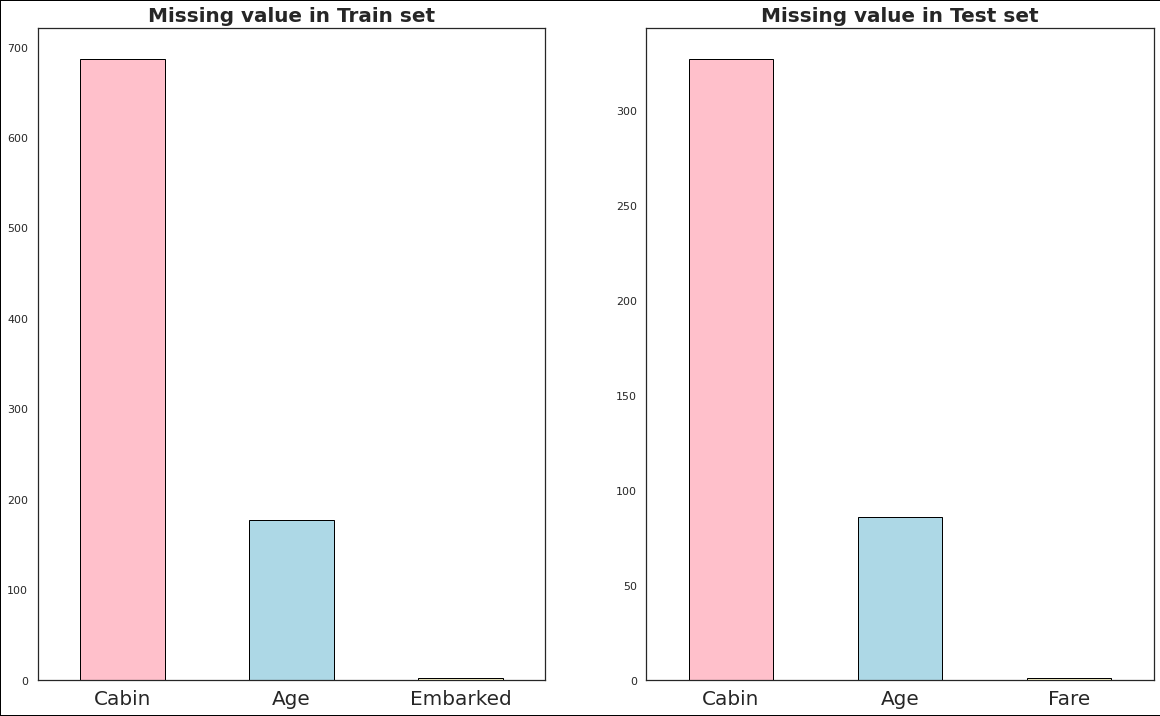

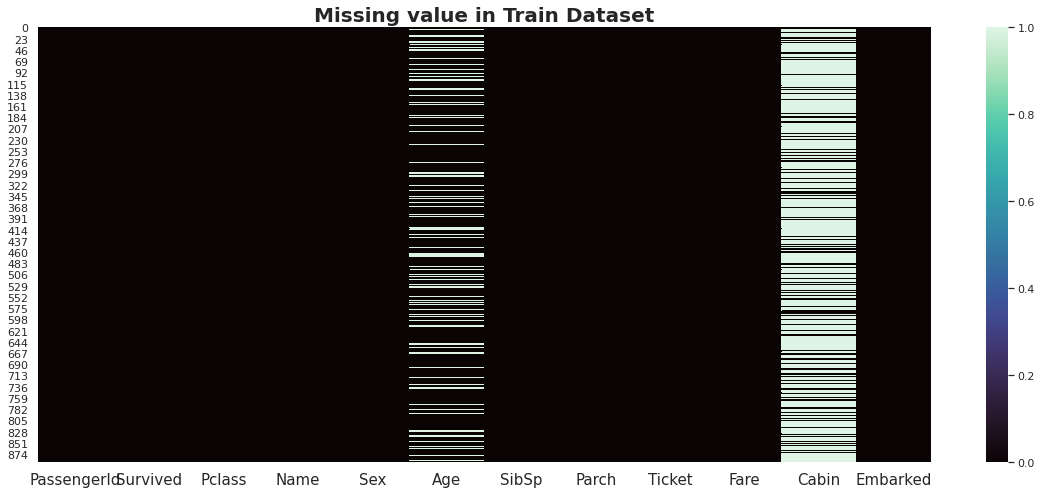

In [7]:
def Missing_Val(df, x):
    Missing_val = df.isnull().sum()
    Missing_val = Missing_val[Missing_val > 0]
    Missing_val.sort_values(inplace=True ,ascending=False)
    Missing_val_percent =((Missing_val/len(df)) * 100).round(2) 
    Missing_val_table = pd.concat([Missing_val,Missing_val_percent],axis = 1)
    Missing_val_table = Missing_val_table.rename(
        columns ={ 0 : "No. of Missing values" , 1 : "% of Missing values"})
    
    #Visalizing the Misiing values
    y = { 0 : "Train" , 1 :'Test'} 
    
    sns.set_style('white')
    Missing_val.plot.bar(ax = ax[x] ,color =['pink','lightblue','lemonchiffon'],edgecolor='black'
                         , linewidth= 1 )
    ax[x].tick_params(axis='x', which='major', labelsize=20, rotation = 360)
    ax[x].set_title(f'Missing value in {y[x]} set', fontsize=20, fontweight='semibold')
    
    print('           'f'The Missing Values in {y[x]} set are \n\n'  ,Missing_val_table , '\n\n' ) 

#Visalizing the Misiing values    
sns.set(style = 'white')
f,ax = plt.subplots(1,2 , figsize = (20,12) ,edgecolor='black',linewidth=2,)
Missing_Val(X_1, 0) 
Missing_Val(test, 1)
    
plt.figure(figsize=(20,8))
sns.heatmap(X_1.isnull(), cmap = "mako")
plt.tick_params(axis='x', which='major', labelsize=15)
plt.title(f'Missing value in Train Dataset', fontsize=20, fontweight='semibold')
plt.show()

* # [Survival Status](https://titanicfacts.net/titanic-survivors/)
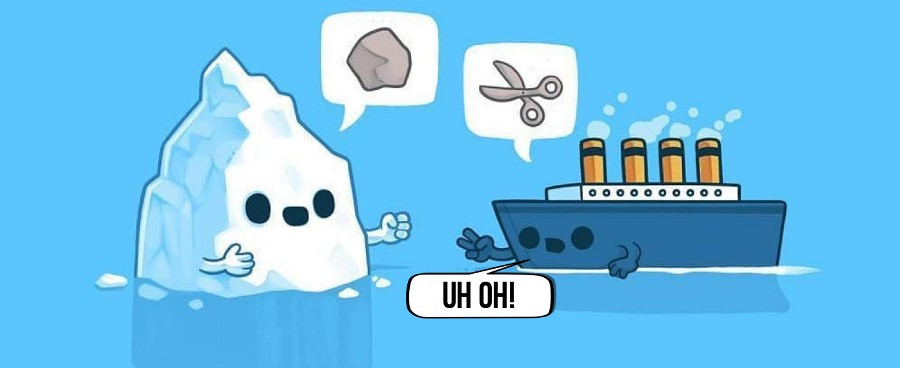

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles = ['Count of Outcome variable','Distribution of Outcome variable'],
    horizontal_spacing = 0.1,
    specs=[[{"type": "xy"}, {"type": "domain"}]],
)
fig.add_trace(go.Bar(x=X_1['Survived'].value_counts().values.tolist()
                     ,marker=dict(color=['black','tomato'])
                     , y =['No','Yes'],orientation = 'h'),
              row=1, col=1)
fig.add_trace(go.Pie(values=X_1['Survived'].value_counts() ,labels = ['No' , 'Yes'],
                     marker=dict(colors=['#101820FF','#F2AA4CFF'])),
              row=1, col=2)
fig.update_layout(showlegend=False,template ="simple_white")

* The above graph shows that 
1. > The data is Imbalanced. 
2. > The number of Survivors is **342**, the number of Non-survivors is 500.
3. > That is survival rate in the Titanic accident is **38.4%**


* # [Gender](http://)

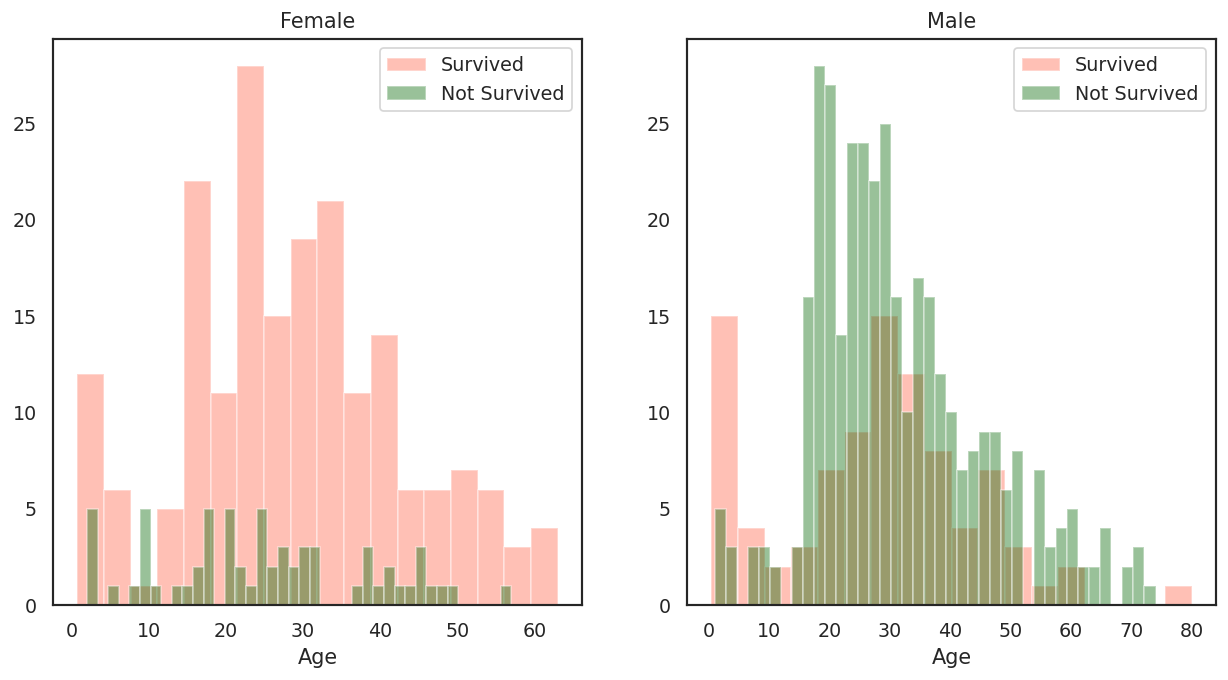

In [9]:
sns.set_style('white')
fig, ax = plt.subplots(1, 2,figsize = (12,6),dpi= 125)
female =X_1[X_1['Sex']=='female']
male = X_1[X_1['Sex']=='male']
ax1 = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = ax[0], kde =False, color = 'tomato')
ax1 = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = 'Not Survived', ax = ax[0], kde =False, color = 'darkgreen')
ax1.legend()
ax1.set_title('Female')
ax2 = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = ax[1], kde = False , color = 'tomato')
ax2 = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = 'Not Survived', ax = ax[1], kde = False, color = 'darkgreen')
ax2.legend()
ax2.set_title('Male');

The analysis show that the survival rate in the Titanic accident was Higher for **Females**.
1.  >  To be specific, the chances of survival was **73.2%** for  **Females** and **21.1%** for **Males**.
1. >  More precisely, the women between the ages of **15 - 42** and men between ages of **30 -35** have the highest probability of surviving the accident.
1. > In males , the kids **(i.e between the age 0- 7)** have more chances of surviving than the **adults**. Also in both sex groups ,**Infants** have a little bit higher probability of survival.


* # [**Passenger Class**](https://en.wikipedia.org/wiki/Passengers_of_the_Titanic)
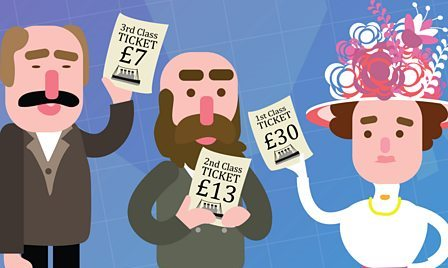

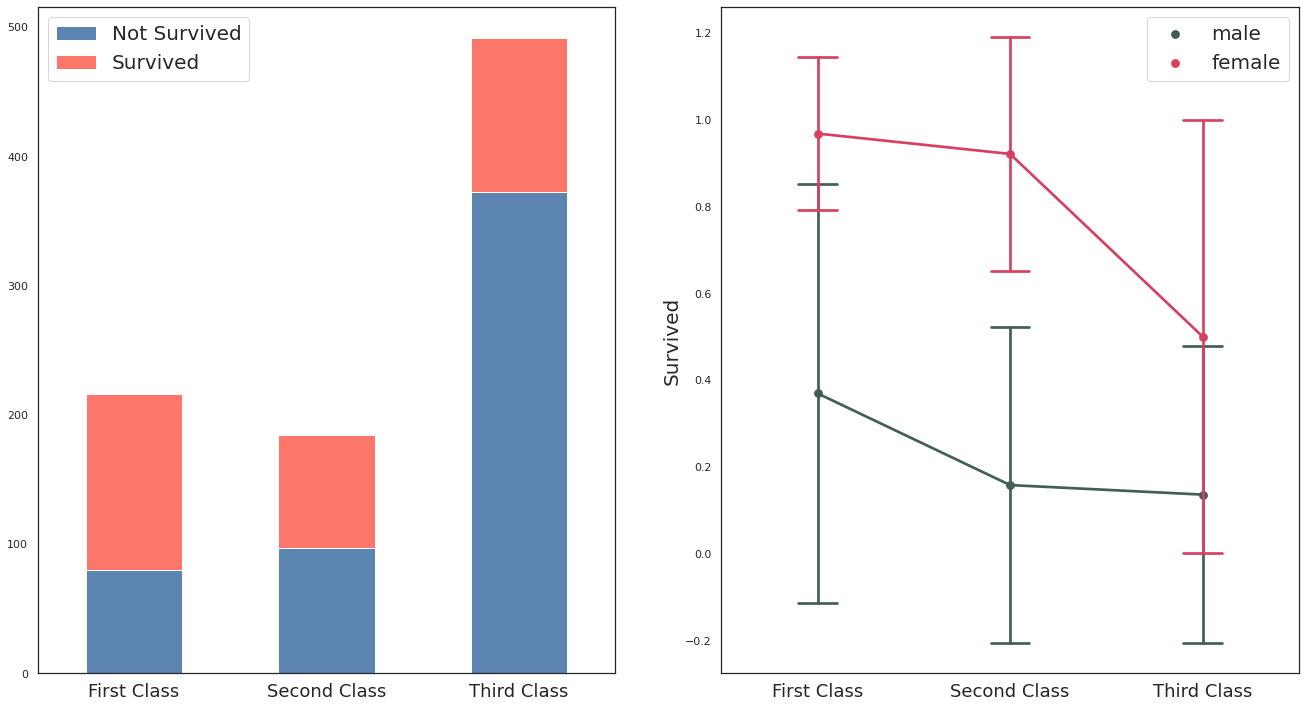

In [10]:
df_Pclass = pd.DataFrame(X_1[X_1.Survived ==0]['Pclass'].value_counts())
df_Pclass['1'] = X_1[X_1.Survived == 1]['Pclass'].value_counts()
df_Pclass.rename(columns={"Pclass": "Not Survived", "1": "Survived"} , inplace=True)

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize = (20,10))
plt.subplots_adjust(wspace= 10)
ax1 = df_Pclass.plot(kind ='bar' , stacked = True , color =['#5B84B1FF' ,"#FC766AFF"]
                    ,ax = ax[0])
ax1.set_xticklabels(['Third Class', 'Second Class','First Class'] ,
                    rotation  = 360 ,fontdict = {'fontsize' : 18})
ax1.legend(prop={'size': 20} ,fontsize= 'xx-large')

sns.axes_style("whitegrid")
ax2 =sns.pointplot(x="Pclass", y="Survived", hue="Sex",kind="point",ci ='sd',
                   palette = ['#435E55FF' , '#D64161FF'],data=X_1,capsize=.2 , ax = ax[1])
ax2.set_xticklabels(['First Class', 'Second Class','Third Class'] ,
                    rotation  = 360 ,fontdict = {'fontsize' : 18})
ax2.set_xlabel('')
ax2.set_ylabel('Survived' ,fontdict = {'fontsize' : 20} )
ax2.legend(prop={'size': 20} ,fontsize= 'xx-large')
fig.tight_layout()

1. The Survival Rate among the First (1st) Class Passenger's is 62.96% ,the highest among all the three passenger classes. 
   More precisely, Women's with First Class ticket have **42.12%** chances of survival than Men's who have **20.83%**
     
2. Second (2nd) Class Passenger's have **47.28%** survivors out of which **38.04%** are Women and **9.23%** are Men .

3. And finally, the Third (3rd) Class Passenger's have the lowest **24.23%** chances of surviving ,

Here we can see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. The women have a much higher chance of survival, with even women in 3rd class having a higher chance of survival than men in 1st class.


# [Embarked](https://en.wikivoyage.org/wiki/RMS_Titanic)

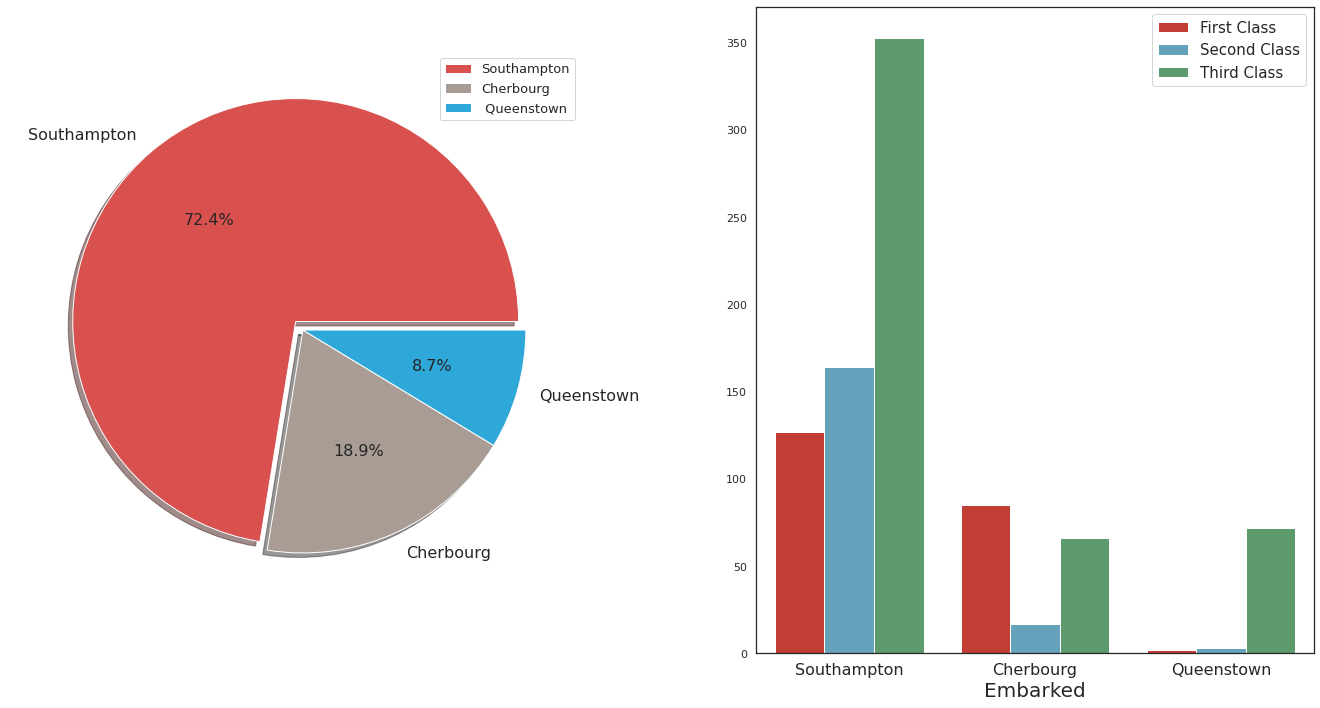

In [11]:
sns.set(style="white")
fig , ax = plt.subplots(1,2,figsize= (20,10))
plt.subplots_adjust(wspace= 10)
ax1 = (X_1.Embarked.value_counts()).plot(kind ='pie', y = 'Embarked',autopct="%.1f%%",
                    labels = ['Southampton','Cherbourg','Queenstown'],
                    colors = ['#D9514EFF','#A89C94FF','#2DA8D8FF'],
                    textprops = {"fontsize":16},
                    shadow = True,
                     explode = (0.05,0,0),ax = ax[0])
ax1.legend(labels= ['Southampton', 'Cherbourg',' Queenstown'] ,prop={'size': 13} )
ax1.set_ylabel(' ')

ax2 = sns.countplot(x='Embarked',hue= 'Pclass',palette = ['#DA291CFF','#56A8CBFF' , '#53A567FF'],
                    data= X_1 ,ax = ax[1] )
ax2.set_xticklabels(['Southampton','Cherbourg','Queenstown'], fontdict={'fontsize' : 16})
ax2.set_ylabel(' ')
ax2.set_xlabel('Embarked' , fontsize =20)
ax2.legend(labels= ['First Class', 'Second Class','Third Class'] ,prop={'size': 15})
fig.tight_layout()

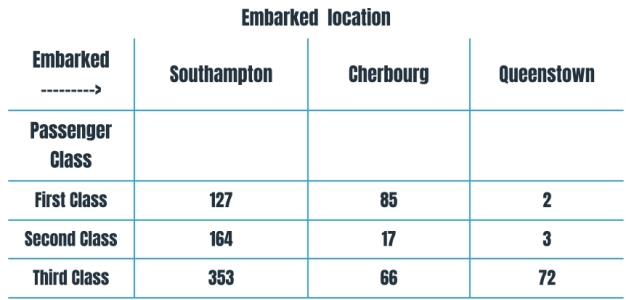
1. * Here we can see that ,as the main port of call for the Titanic, the city of Southampton has a very important relationship with the ill-fated ship. Not only did most of the passengers board the Titanic at  **Southampton**, but many of the ship’s crew did as well.From Southampton, Titanic docked in (**Cherbourg, France**) and finally **Queenstown**, now Cobh, in Ireland before heading for New York City.
1. * **Women** embarking from the port of the **Queenstown** and **Southampton** have a higher chance of survival.
1. * Where Men boarding the ship from **Cherbourg** have the high chances of survival than the Men getting aboard from the Queenstown and Southampton 

# [**Feature Engineering**](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10#:~:text=Feature%20engineering%20is%20the%20process,design%20and%20train%20better%20features.)

           The Missing Values in Train set are 

           No. of Missing values  % of Missing values
Old_Deck                   1014                77.46
Age                         263                20.09
Embarked                      2                 0.15
Fare                          1                 0.08 




Text(0.5, 1.0, 'Correlation between features')

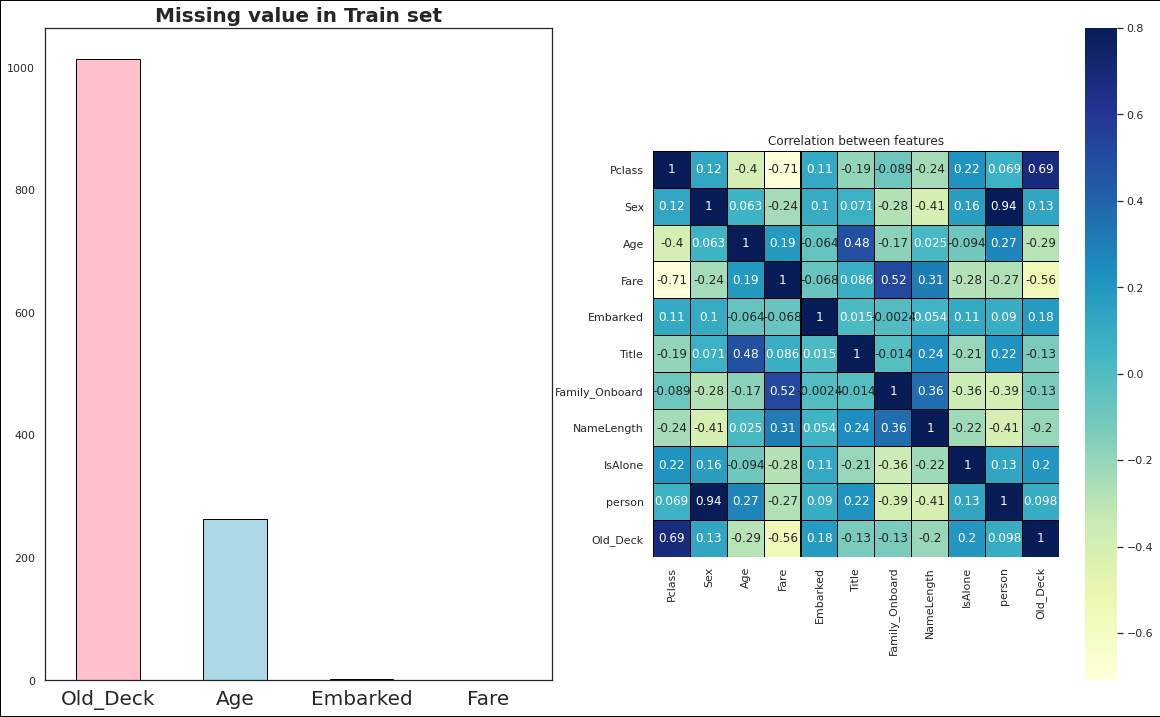

In [12]:
data = pd.concat([train, test])

# Extracting the Title's from Name column 

data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
data['Title'] = data['Title'].replace({'Mlle.':'Miss.', 'Mme.':'Mrs.', 'Ms.':'Miss.'})
data['Title'] = data['Title'].replace(['Don.', 'Dona.', 'Rev.', 'Dr.','Major.', 'Lady.', 
                                'Sir.', 'Col.', 'Capt.', 'Countess.', 'Jonkheer.','the'],'Special')


#Extracting Family Information from columns
data['Family_Onboard'] = data['SibSp'] + data['Parch']
data["NameLength"] = data["Name"].apply(lambda x: len(x))
data['IsAlone'] =  ['Alone' if x == 1 else 'Not Alone' for x in data['Family_Onboard']]

#Creating unique person identifier
child_age = 18
def get_person(passenger):
    age, sex ,title = passenger
    if (age < child_age) or (title == 'Master.'):
        if (sex == 'male'):
            return 'male child'
        elif (sex == 'female') or (title == 'Miss.'):
            return 'female child'
    elif (sex == 'female'):
        return 'female_adult'
    else:
        return 'male_adult'
data = pd.concat([data, pd.DataFrame(data[['Age', 'Sex', 'Title']].apply(get_person, axis=1)
                                     , columns=['person'])],axis=1)

#Extracting Deck information from Cabins Column
data['Old_Deck'] = data['Cabin'].str[0]


# Dropping the unnecessary features from the data 

data.drop(['Name','SibSp','Parch','Ticket','Cabin','PassengerId','Survived'] , axis = 1,inplace = True) 

#Creating copy for visualization
data_ = data.copy()

#Seprating Variables for encoding
Quantitative = [f for f in data.columns if data_.dtypes[f] != 'object' ]
Qualitative = [f for f in data.columns if data_.dtypes[f] == 'object' ]




#Visalizing the Misiing values 
sns.set(style = 'white')
f,ax = plt.subplots(1,2 , figsize = (20,12) ,edgecolor='black',linewidth=2,)
Missing_Val(data_, 0) 
from sklearn.preprocessing import LabelEncoder
label_object = {}
for col in Qualitative:
    labelencoder = LabelEncoder()
    labelencoder.fit(data_[col])
    data_[col] = labelencoder.fit_transform(data_[col])
    label_object[col] = labelencoder
corr=data_.corr(method='spearman')
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')

****We have most missing values in Old_Deck Column.
 On the RHS we can see that Deck is highly correlated to Pclass and Fare. So let's find missing values using these two columns.****

In [13]:
key = ['Pclass','Old_Deck']
df2 = data.groupby( key)['Fare'].median() 
df3 = df2.reset_index()
print(df3)
data['Old_Deck'].fillna('0' ,inplace =True)

print('We will be using the median value of Fare for Pclass and Deck combination to find missing Deck values')


    Pclass Old_Deck      Fare
0        1        A  35.07710
1        1        B  82.26670
2        1        C  86.28960
3        1        D  53.10000
4        1        E  55.44170
5        1        T  35.50000
6        2        D  13.39585
7        2        E  11.42500
8        2        F  26.00000
9        3        E  12.47500
10       3        F   7.65000
11       3        G  16.70000
We will be using the median value of Fare for Pclass and Deck combination to find missing Deck values


In [14]:
def get_deck(passenger):
    pclass, fare ,deck  = passenger
    if pclass == 1  and deck == '0':
        if  (fare >= 82.26670):
            return 'B'
        elif (fare >= 86.28960) and (fare <= 82.26670):
            return 'C'
        elif (fare >= 55.44170) and (fare <= 86.28960):
            return 'E'
        elif (fare >= 53.10000) and (fare <= 55.44170):
            return 'D'
        elif (fare >= 35.50000) and(fare <= 53.10000):
            return 'T'
        elif (fare >= 35.07710) and (fare <= 35.5):
            return 'A'
        else:
            return 'A'
    elif pclass == 2 and deck == '0':
        if  (fare >= 26.00000):
            return 'F'
        elif (fare >= 13.39585) and (fare <= 26.00000):
            return 'D'
        elif (fare >= 11.42500) and(fare <= 13.39585):
            return 'E'
        else:
            return 'E'
    elif pclass == 3 and deck =='0' :
        if  (fare >= 16.70000):
            return 'G'
        elif (fare >= 12.47500) and (fare <= 16.70000):
            return 'E'
        elif (fare >= 7.65000) and (fare <= 7.65000):
            return 'F'
        else:
            return 'F'
    else :
        return deck
    
data = pd.concat([data, pd.DataFrame(data[['Pclass', 'Fare', 'Old_Deck']].apply(get_deck, axis=1), columns=['Deck'])],axis=1)

data.drop(['Old_Deck'] , axis = 1,inplace = True) 

#Creating the train test sets

X_train_old = data[0:891]
X_test = data[891:]

#Copy for visualization
X = X_train_old.join(y_train)

* #  [Title's](https://titanicfacts.net/titanic-passenger-list/)

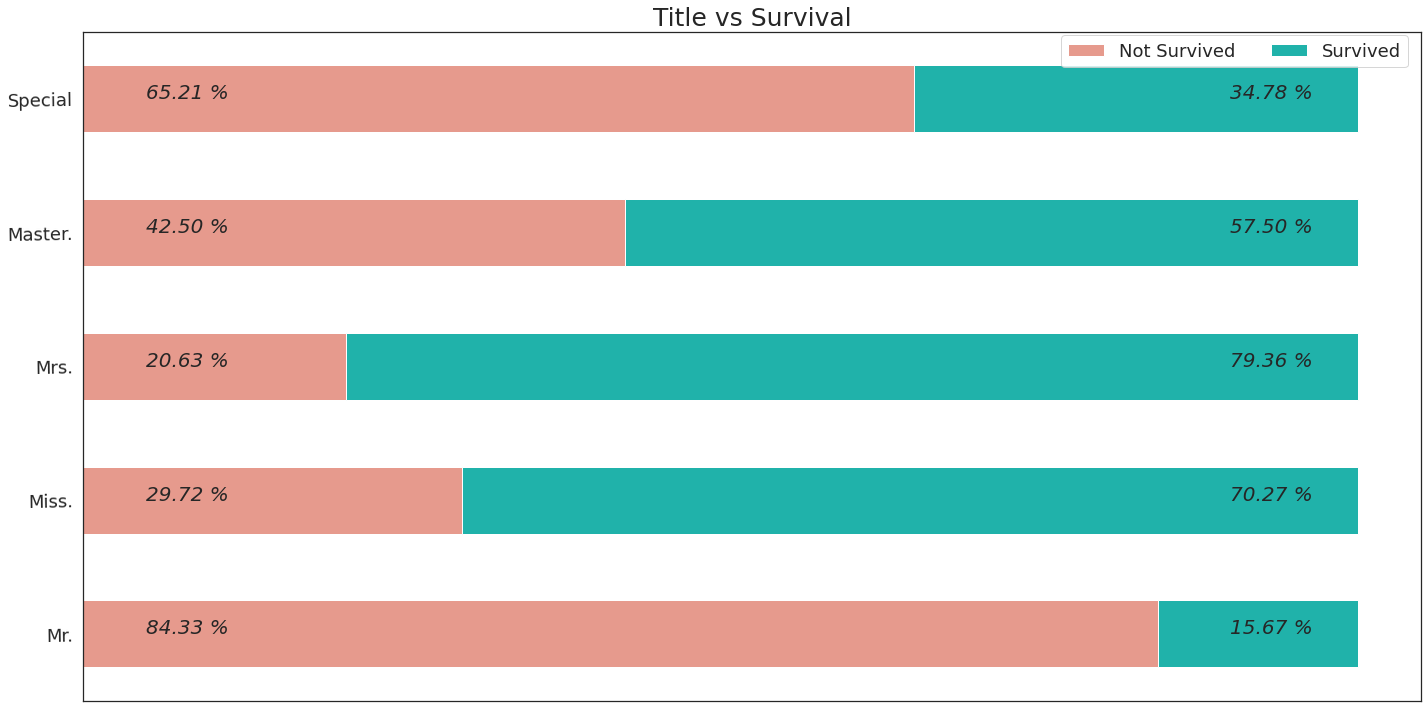

In [15]:
sns.set_style('white')

f , ax = plt.subplots()
df_Title = pd.DataFrame(X[X.Survived == 0]['Title'].value_counts())
df_Title['1'] = X[X.Survived == 1]['Title'].value_counts()
df_Title['Not Survived'] = df_Title['Title']*100/(df_Title['Title']+df_Title['1'])
df_Title['Survived'] = df_Title['1']*100/(df_Title['Title']+df_Title['1'])
df_Title.drop(['Title','1'],axis=1 ,inplace =True)
ax = df_Title.plot(kind='barh',rot=1, stacked=True,figsize=(20, 10) ,
                 ax = ax ,color = ['#E69A8DFF','lightseagreen'] )
plt.title(label = 'Title vs Survival' , fontdict = {'fontsize' : 25})
plt.xticks([], [])
ax.set_yticklabels(labels =['Mr.','Miss.','Mrs.','Master.','Special'] , fontdict = {'fontsize' : 18})
ax.text(5,0, '84.33 %', style='oblique',fontsize = 20)
ax.text(5,1, '29.72 %', style='oblique',fontsize = 20)
ax.text(5,2, '20.63 %', style='oblique',fontsize = 20)
ax.text(5,3, '42.50 %', style='oblique',fontsize = 20)
ax.text(5,4, '65.21 %', style='oblique',fontsize = 20)
ax.text(90,0, '15.67 %', style='oblique',fontsize = 20)
ax.text(90,1, '70.27 %', style='oblique',fontsize = 20)
ax.text(90,2, '79.36 %', style='oblique',fontsize = 20)
ax.text(90,3, '57.50 %', style='oblique',fontsize = 20)
ax.text(90,4, '34.78 %', style='oblique',fontsize = 20)
plt.legend(bbox_to_anchor=(0.99, 0.995) ,loc='upper right', borderaxespad=0. ,prop={'size': 18} , ncol = 2 ,fontsize= 'xx-large');
plt.tight_layout();

In [16]:
fig = px.scatter(X,x="Title", y="Age", color="Survived", log_x=False
                     , size_max=20,
                      title="To be or not to be?")
fig.show();

* # [Deck](https://jamescameronstitanic.fandom.com/wiki/Titanic_Decks)

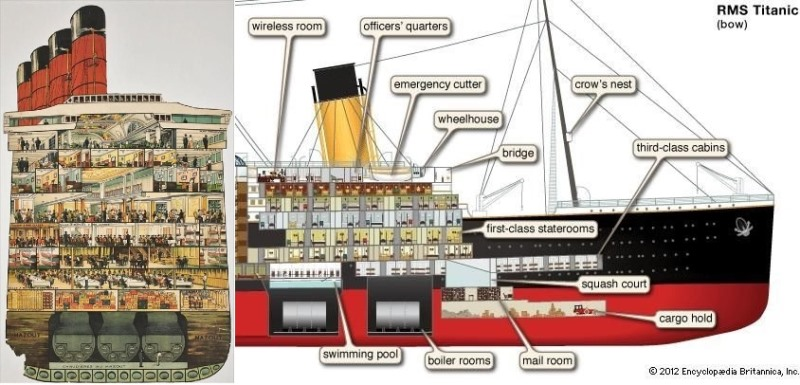
* The Titanic has primarily 8 Decks:

1. **A Deck** ,It was reserved exclusively for First Class passengers and contained First Class cabins, the First Class lounge, smoke room, reading and writing rooms and Palm Court.

2. **B Deck**  More First Class passenger accommodation was located here.

3. **C Deck** The Shelter Deck, was the highest deck to run uninterrupted from stem to stern. It included both well decks; the aft one served as part of the Third Class promenade. Crew cabins were housed below the forecastle and Third Class public rooms were housed below the Poop Deck. In between were the majority of First Class cabins and the Second Class library.

4. **D Deck**, the Saloon Deck, was dominated by three large public rooms—the First Class Reception Room, the First Class Dining Saloon and the Second Class Dining Saloon. An open space was provided for Third Class passengers. First, Second and Third Class passengers had cabins on this deck

5. **E Deck**, the Upper Deck, was predominantly used for passenger accommodation for all three classes plus berths for cooks, seamen, stewards and trimmers. Along its length ran a long passageway nicknamed Scotland Road, in reference to a famous street in Liverpool. Scotland Road was used by Third Class passengers and crew members

6. **F Deck**, the Middle Deck, was the last complete deck and mainly accommodated Second and Third Class passengers and several departments of the crew.

7. **G Deck**, the Lower Deck, was the lowest complete deck that carried passengers, and had the lowest portholes.The tank top is the lowest deck of a ship, below the Orlop Deck. On the Titanic, it housed the engines and boiler rooms. The boiler rooms also were in this deck. This was the first deck to flood.

8. **T Deck** that were on the lowest level of the ship, below the waterline.This area of the ship was occupied by the engine and boiler rooms


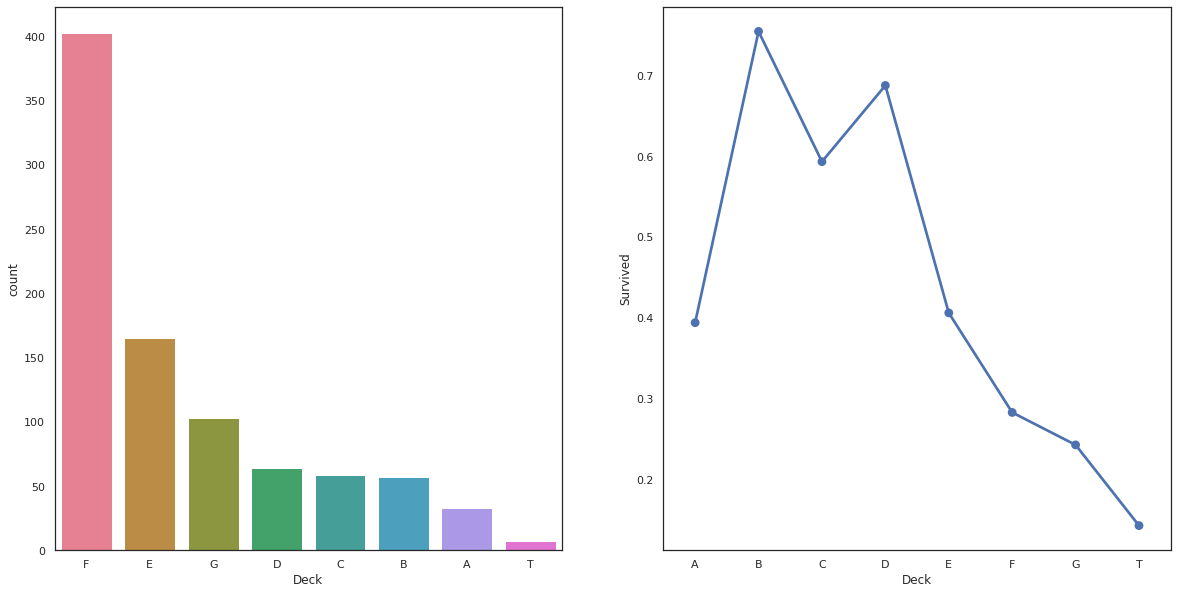

In [17]:
#for the Deck
fig , ax = plt.subplots(1,2,figsize=(20,10))
sns.set_style('white')
ax1 = sns.countplot(x='Deck', data= X ,palette = "husl",order = X['Deck'].value_counts().index  , ax =ax[0])
ax =sns.pointplot(y ='Survived', x ='Deck'
               ,order = ['A','B','C','D','E','F','G','T'], data = X ,ci = None ,ax =ax[1] )

In [18]:
import plotly.express as px
fig = px.scatter_3d(X, x='Survived', y='Deck', z='Age',
                    color='Age', symbol ='Pclass',color_continuous_scale= 'fall' )
fig.show()

In [19]:
cleanup = {"Embarked":     {"S": 'Southampton', "C": "Cherbourg" , "Q": 'Queenstown'},
                "Survived": { 0 : 'Survived', 1 : 'Not Survived'}}
df = X.replace(cleanup)
fig = px.sunburst(df, path=[df['Embarked'].fillna('S'),df['Survived'],df['Sex'] ,df['Deck'].fillna('Unknown')])
fig= fig.update_layout(title_text="Embarked Vs Survival ")
fig.show()

Here we can conclude that 
1. * The survival chances lower as we go from A to T
1. * There were no survivors from the deck T

# [Correlation](https://en.wikipedia.org/wiki/Correlation)

Pclass            False
Sex               False
Age               False
Fare              False
Embarked          False
Title             False
Family_Onboard    False
NameLength        False
IsAlone           False
person            False
Deck              False
Survived           True
Name: Survived, dtype: bool


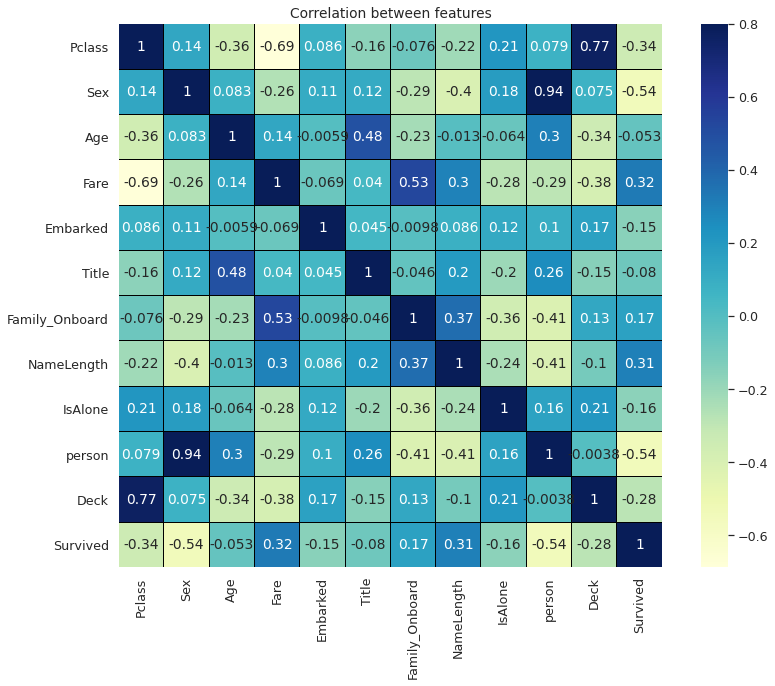

In [20]:
Quantitative_1 = [f for f in data.columns if data.dtypes[f] != 'object' ]
Qualitative_1 = [f for f in data.columns if data.dtypes[f] == 'object' ]

from sklearn.preprocessing import LabelEncoder
label_object = {}
for col in Qualitative_1:
    labelencoder_1 = LabelEncoder()
    labelencoder_1.fit(X[col])
    X[col] = labelencoder_1.fit_transform(X[col])
    label_object[col] = labelencoder_1

corr=X.corr(method='spearman')
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
print(abs(corr['Survived'] > 0.5))

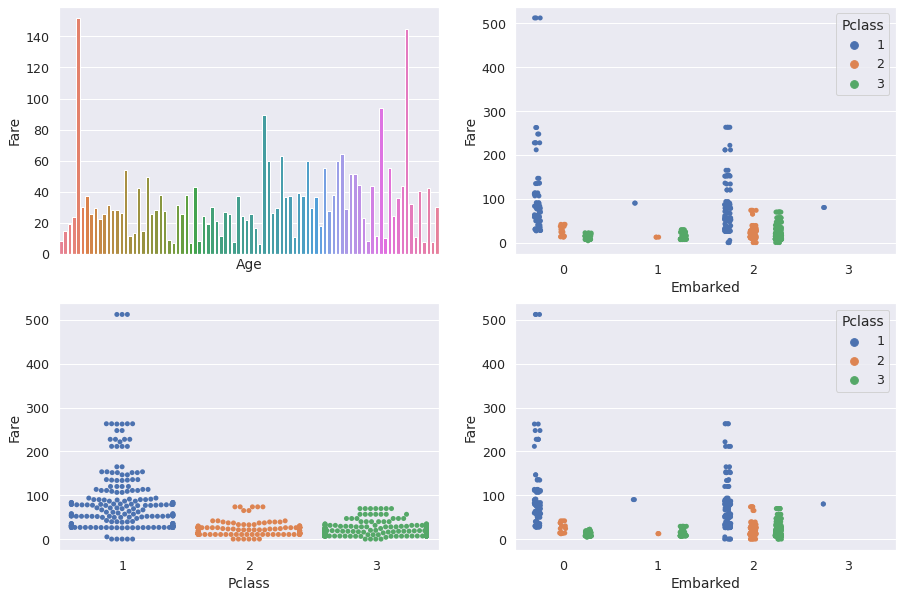

In [21]:
fig , ax =plt.subplots(2,2,figsize=(15,10))
ax1 =sns.barplot(x="Age", y="Fare", data= X.dropna(),palette = 'husl',ci=None,ax = ax[0,0]  )
ax1.set_xticks([])
ax2= sns.stripplot(x='Embarked',y='Fare',hue= 'Pclass',data=X ,dodge = True,ax = ax[0,1])
ax3= sns.swarmplot(x="Pclass", y="Fare", data= X ,ax = ax[1,0])
ax4= sns.stripplot(x='Embarked',y='Fare',hue= 'Pclass',data=X ,dodge = True,ax = ax[1,1])

Fare was fixed for the all Age Groups and depends only on 

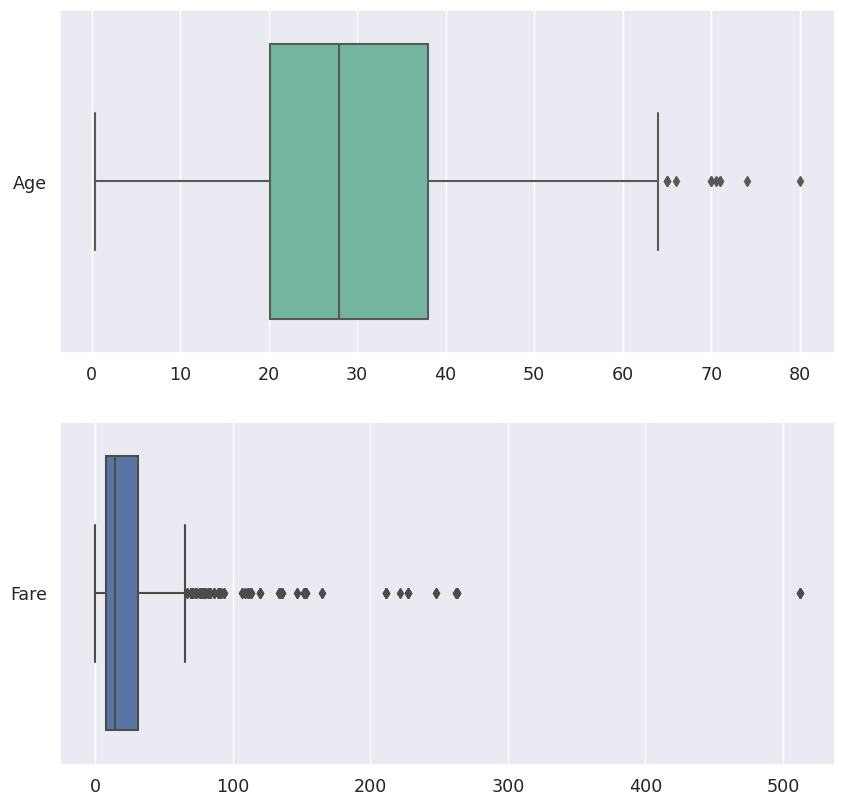

In [22]:
fig ,ax = plt.subplots(2,1, figsize = (10,10) ,linewidth= 1,dpi=100)
ax1 = sns.boxplot(data=X_train_old[['Age']] , orient="h", palette="Set2" , ax = ax[0])
ax2 = sns.boxplot(data=X_train_old[['Fare']], orient="h" ,ax = ax[1])

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Violin(x=X['Age'].dropna(), box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6
                               ,orientation = 'h' , y0= 'Age'),row =1,col=1)

fig.add_trace(go.Violin(x=X['Fare'].dropna(), box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6
                              ,orientation = 'h' ),row =2,col=1) 

fig.update_layout(xaxis_visible=False,yaxis_zeroline=False,showlegend = False)
fig.update_xaxes(title='Age', visible=False, showticklabels=False)
fig.update_yaxes(title='y', visible=False, showticklabels=False)
fig.show()

fig , ax =plt.subplots(1,2,figsize=(10,10))
ax1 = sns.distplot(X['Age'],ax = ax[0])
ax2 =sns.distplot(X_train['Fare'],bins = 40,ax = ax[1])
import scipy.stats as stats
skw = stats.skew(X['Age'].dropna())
print( '\nSkewness for data : ', skw)
if skw == 0:
    print( 'Distribution is Normal')
if skw > 0:
    print( 'Distribution is Left Skewed')
if skw < 0:
    print( 'Distribution is Right Skewed')
skw1 = stats.skew(X['Fare'].dropna())
print( '\nSkewness for data : ', skw)
if skw1 == 0:
    print( 'Distribution is Normal')
if skw1 > 0:
    print( 'Distribution is Left Skewed')
if skw1 < 0:
    print( 'Distribution is Right Skewed')

# [**Analysis**](http://)

In [24]:
train_data = pd.concat([X_train_old, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.Survived==0]
positive = train_data[train_data.Survived==1]
# upsample minority
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
X_train = pd.concat([negative, pos_upsampled])
y_train_1 = X_train.Survived
X_train.drop(['Survived'] , axis = 1,inplace = True) 


In [25]:
print(X_train)

     Pclass     Sex   Age      Fare Embarked    Title  Family_Onboard  \
0         3    male  22.0    7.2500        S      Mr.               1   
4         3    male  35.0    8.0500        S      Mr.               0   
5         3    male   NaN    8.4583        Q      Mr.               0   
6         1    male  54.0   51.8625        S      Mr.               0   
7         3    male   2.0   21.0750        S  Master.               4   
..      ...     ...   ...       ...      ...      ...             ...   
43        2  female   3.0   41.5792        C    Miss.               3   
393       1  female  23.0  113.2750        C    Miss.               1   
549       2    male   8.0   36.7500        S  Master.               2   
31        1  female   NaN  146.5208        C     Mrs.               1   
457       1  female   NaN   51.8625        S     Mrs.               1   

     NameLength    IsAlone        person Deck  
0            23      Alone    male_adult    F  
4            24  Not Alone 

In [26]:
print(X_test)

     Pclass     Sex   Age      Fare Embarked    Title  Family_Onboard  \
0         3    male  34.5    7.8292        Q      Mr.               0   
1         3  female  47.0    7.0000        S     Mrs.               1   
2         2    male  62.0    9.6875        Q      Mr.               0   
3         3    male  27.0    8.6625        S      Mr.               0   
4         3  female  22.0   12.2875        S     Mrs.               2   
..      ...     ...   ...       ...      ...      ...             ...   
413       3    male   NaN    8.0500        S      Mr.               0   
414       1  female  39.0  108.9000        C  Special               0   
415       3    male  38.5    7.2500        S      Mr.               0   
416       3    male   NaN    8.0500        S      Mr.               0   
417       3    male   NaN   22.3583        C  Master.               2   

     NameLength    IsAlone        person Deck  
0            16  Not Alone    male_adult    F  
1            32      Alone 

In [27]:
X_train.drop(['Age','Title'] , axis = 1,inplace = True)
X_test.drop(['Age','Title'] , axis = 1,inplace = True)

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [[ 'T', 'G', 'F', 'E', 'D','C', 'B', 'A']])
X_train['Deck'] = oe.fit_transform(X_train[['Deck']])
X_test['Deck'] = oe.transform(X_test[['Deck']])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
ct = ColumnTransformer(transformers=[
                                     ('encoder', OneHotEncoder(), ['Pclass','Sex','IsAlone','person','Embarked'])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

from sklearn.impute import KNNImputer
imputer = KNNImputer(weights = 'distance',n_neighbors = 2)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
cl = GradientBoostingClassifier()
cl.fit(X_train , y_train_1)
y_pred = cl.predict(X_test)
ouput_submission = pd.DataFrame(test['PassengerId'])
ouput_submission['Survived'] = y_pred
ouput_submission.to_csv("../working/ouput_submission.csv", index=False)